1. Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Importing date and time

In [ ]:

from datetime import date , datetime , timedelta

In [ ]:
import warnings
warnings.filterwarnings('ignore')

2. Load and Prepare Data

In [ ]:
data_detailed = pd.read_csv("/country_vaccinations.csv")
data_total = pd.read_csv("/country_vaccinations_by_manufacturer.csv")

3. Exploratory Data Analysis

3-1. Getting information about datasets

In [ ]:
print("* "*10+" data_detailed "+" *"*10)
print("\nShape: rows = {} , columns = {}".format(data_detailed.shape[0] , data_detailed.shape[1]))
print(data_detailed.info())
print("* "*10+" data_total "+" *"*10)
print("\nShape: rows = {} , columns = {}".format(data_total.shape[0] , data_total.shape[1]))
print(data_total.info())

* * * * * * * * * *  data_detailed  * * * * * * * * * *

Shape: rows = 74961 , columns = 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74961 entries, 0 to 74960
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              74961 non-null  object 
 1   iso_code                             74961 non-null  object 
 2   date                                 74961 non-null  object 
 3   total_vaccinations                   39262 non-null  float64
 4   people_vaccinated                    37222 non-null  float64
 5   people_fully_vaccinated              34488 non-null  float64
 6   daily_vaccinations_raw               32091 non-null  float64
 7   daily_vaccinations                   74636 non-null  float64
 8   total_vaccinations_per_hundred       39262 non-null  float64
 9   people_vaccinated_per_hundred        37222 non-null  float64
 10  pe

In [ ]:
data_detailed.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
data_detailed.tail(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
74958,Zimbabwe,ZWE,2022-02-02,7593924.0,4282687.0,3311237.0,15502.0,8608.0,50.32,28.38,21.94,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
74959,Zimbabwe,ZWE,2022-02-03,7600946.0,4286198.0,3314748.0,7022.0,8296.0,50.36,28.40,21.96,550.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
74960,Zimbabwe,ZWE,2022-02-04,7611929.0,4292012.0,3319917.0,10983.0,8188.0,50.44,28.44,22.00,543.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
data_total.head(3)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0


In [ ]:
data_total.tail(3)

,location,date,vaccine,total_vaccinations
26923,European Union,2022-02-04,Sinopharm/Beijing,2282680
26924,European Union,2022-02-04,Sinovac,9
26925,European Union,2022-02-04,Sputnik V,1845085


In [ ]:
data_total.describe()

,total_vaccinations
count,2.692600e+04
mean,1.489762e+07
std,4.939739e+07
min,0.000000e+00
25%,2.163602e+05
50%,1.390612e+06
75%,7.741782e+06
max,5.673042e+08


In [ ]:
data_detailed.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.926200e+04,3.722200e+04,3.448800e+04,3.209100e+04,7.463600e+04,39262.000000,37222.000000,34488.000000,74636.000000
mean,3.874883e+07,1.524876e+07,1.135966e+07,2.759083e+05,1.373042e+05,70.884561,37.883154,31.999179,3454.952583
std,1.952254e+08,6.089730e+07,4.676853e+07,1.247145e+06,8.077975e+05,61.919059,28.551566,27.416304,4077.171026
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.595825e+05,3.080022e+05,1.997862e+05,5.374500e+03,9.927500e+02,12.640000,9.310000,5.187500,694.000000
50%,3.041700e+06,1.898688e+06,1.347336e+06,2.673400e+04,8.019500e+03,57.055000,36.170000,25.990000,2271.000000
75%,1.435591e+07,7.674247e+06,5.974792e+06,1.275480e+05,4.592525e+04,120.290000,64.300000,57.262500,5010.000000
max,3.002896e+09,1.266070e+09,1.227387e+09,2.474100e+07,2.242429e+07,330.420000,122.820000,120.930000,117497.000000


In [ ]:
data_detailed.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     35699
people_vaccinated                      37739
people_fully_vaccinated                40473
daily_vaccinations_raw                 42870
daily_vaccinations                       325
total_vaccinations_per_hundred         35699
people_vaccinated_per_hundred          37739
people_fully_vaccinated_per_hundred    40473
daily_vaccinations_per_million           325
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Finding last date in the dataet


In [ ]:
data_detailed.date.max() , data_total.date.max()

('2022-02-04', '2022-02-05')

3-2. Data Cleaning

In [ ]:
#Filling NaNs with 0 and then drop all countries with iso_code = 0. 
data_detailed.fillna(0, inplace = True)
data_detailed.drop(data_detailed.index[data_detailed['iso_code'] == 0], inplace = True)

In [ ]:
#Checking how many nulls we have 
data_detailed.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
data_total.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

4-Visualization Part

4-1. Finding heat map

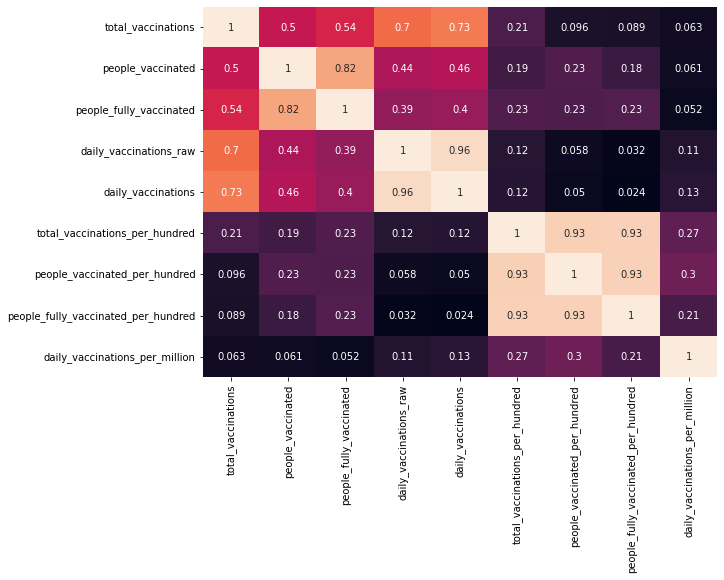

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_detailed.corr(),annot=True,cbar=False)
plt.tight_layout(pad=0.5)
plt.show()

4-2.Finding which country is using what vaccines

In [ ]:
countries = data_detailed.country.unique()

for country in countries:
    print(country,end = ":\n")
    print(data_detailed[data_detailed.country == country]['vaccines'].unique()[0] , end = "\n"+"_"*20+"\n\n")

Afghanistan:
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
____________________

Albania:
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
____________________

Algeria:
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
____________________

Andorra:
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
____________________

Angola:
Oxford/AstraZeneca
____________________

Anguilla:
Oxford/AstraZeneca, Pfizer/BioNTech
____________________

Antigua and Barbuda:
Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V
____________________

Argentina:
CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
____________________

Armenia:
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
____________________

Aruba:
Pfizer/BioNTech
____________________

Australia:
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
____________________

Austria:
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
____________________

Aze

4-3. Finding top 20 countries with most number of vaccinations

In [ ]:
data_detailed["Total_vaccinations(count)"]= data_detailed.groupby("country").total_vaccinations.tail(1)

In [ ]:
#Top countries with most vaccinations
data_detailed.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
China             3.002896e+09
India             1.687048e+09
United States     5.419998e+08
Brazil            3.677782e+08
Indonesia         3.127091e+08
Japan             2.073192e+08
Pakistan          1.823960e+08
Vietnam           1.816654e+08
Mexico            1.676825e+08
Germany           1.664390e+08
Bangladesh        1.564166e+08
Russia            1.553786e+08
Turkey            1.427355e+08
United Kingdom    1.383776e+08
France            1.374134e+08
Iran              1.344493e+08
Italy             1.301915e+08
Philippines       1.276171e+08
Thailand          1.166660e+08
England           1.160571e+08
Name: Total_vaccinations(count), dtype: float64

In [ ]:
data_detailed['date'] =  pd.to_datetime(data_detailed['date'], format='%Y-%m-%d')

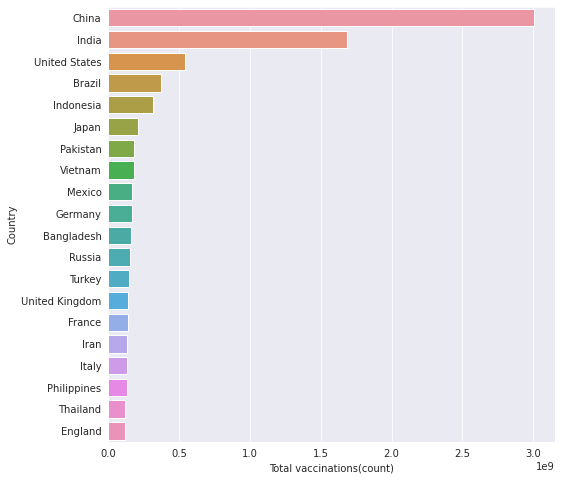

In [ ]:
#barplot visualization of top 20 countries with most vaccinations
x= data_detailed.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

4-4.Finding top 20 countries with fully vaccinated peoples

In [ ]:
#Top countries with fully  vaccinated peoples
data_detailed["Full_vaccinations(count)"]= data_detailed.groupby("country").people_fully_vaccinated.tail(1)

data_detailed.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
India             724768356.0
United States     211707700.0
Brazil            150682483.0
Japan              99849807.0
Pakistan           84731497.0
Mexico             77378510.0
Russia             70232028.0
Germany            61826677.0
Bangladesh         59711538.0
Philippines        59389080.0
Iran               54405243.0
Turkey             52489431.0
France             51639946.0
United Kingdom     48520513.0
Thailand           48425118.0
Italy              46506008.0
South Korea        44053608.0
England            40703257.0
Spain              38316906.0
Argentina          35053130.0
Name: Full_vaccinations(count), dtype: float64

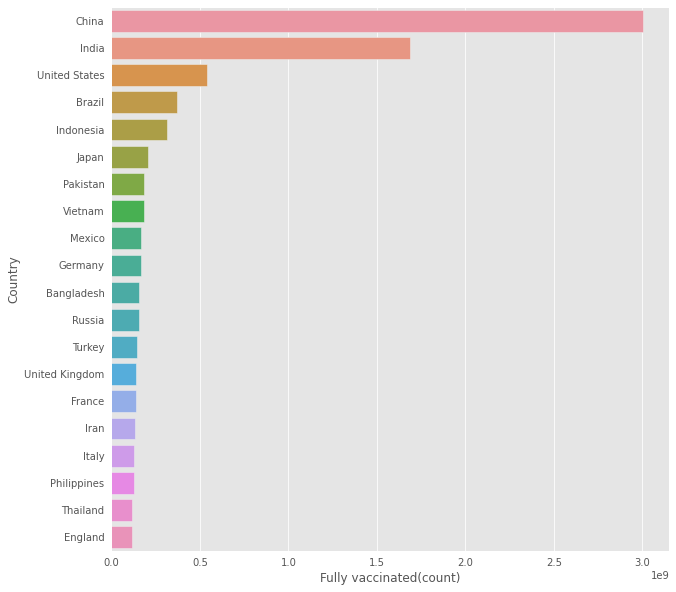

In [ ]:
#barplot visualization of top countries with most full vaccinations

plt.style.use("ggplot")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Fully vaccinated(count)")
ax.set_ylabel("Country")
plt.show()


4-5.Finding all the types of vaccines that are used till 05.02.2022

In [ ]:
#Vaccine types
x=data_detailed.vaccines.unique()
y= list(x)
for i in y: print(i)

Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V
CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Sinopharm/Beijing, Sputnik V
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Pfizer/BioNTech
C

In [ ]:
# Among that, finding the most commonly used vaccines 
data_detailed.vaccines.value_counts()

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech     9497
Oxford/AstraZeneca                                                5800
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                      5574
Oxford/AstraZeneca, Pfizer/BioNTech                               3704
Moderna, Pfizer/BioNTech                                          2902
                                                                  ... 
Covaxin, Oxford/AstraZeneca                                        265
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V          259
Johnson&Johnson, Moderna                                           190
EpiVacCorona, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V     183
Johnson&Johnson, Moderna, Pfizer/BioNTech, Sinopharm/Beijing       167
Name: vaccines, Length: 80, dtype: int64

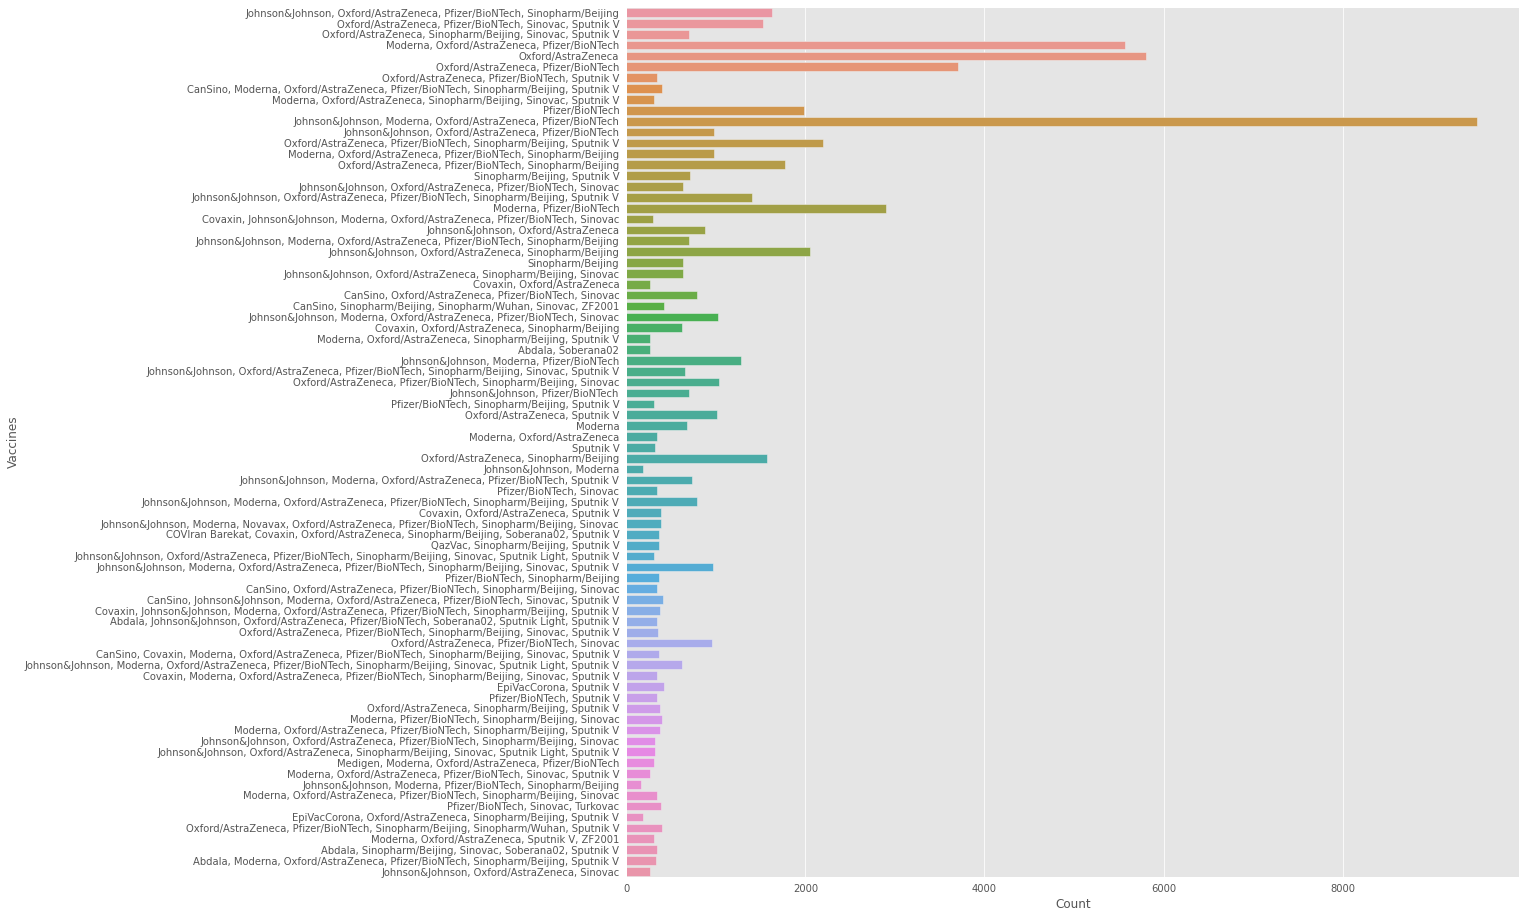

In [ ]:
#bar plot for most commonly used vaccines
plt.figure(figsize=(16,16))
sns.countplot(y= "vaccines",data= data_detailed)
plt.ylabel("Vaccines")
plt.xlabel("Count")
plt.show()

4-6.Graph for the number of daily vaccinations, total vaccinations and daily vaccinations per million

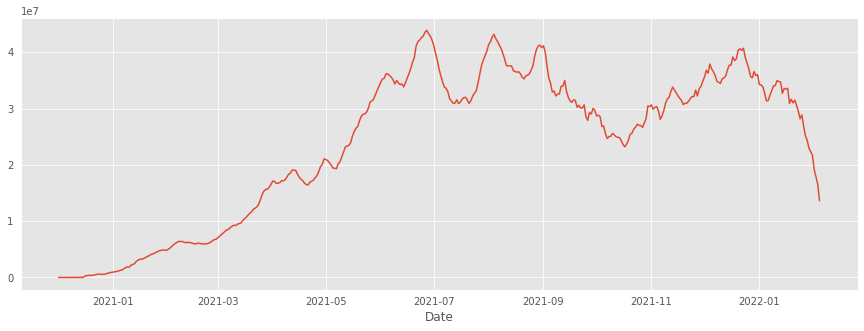

In [ ]:
#daily vaccinations
x= data_detailed.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Date")
plt.show()

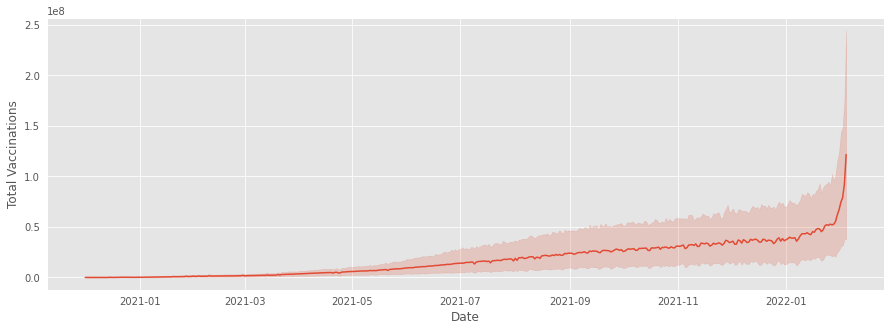

In [ ]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= data_detailed)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

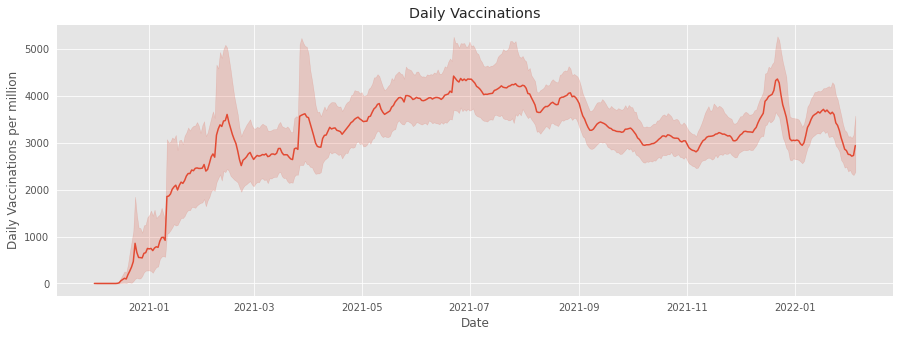

In [ ]:
#daily vaccination per million 
plt.figure(figsize= (15,5))
plt.style.use("ggplot")
sns.lineplot(x= "date",y= "daily_vaccinations_per_million",data= data_detailed)
plt.title("Daily Vaccinations")
plt.ylabel("Daily Vaccinations per million")
plt.xlabel("Date")
plt.show()

Removing unnecessary columns:

In [ ]:
#Print column names and drop the ones that don't intend to use. 
data_detailed.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website',
       'Total_vaccinations(count)', 'Full_vaccinations(count)'],
      dtype='object')

In [ ]:
data_detailed.drop(["daily_vaccinations_raw","people_fully_vaccinated_per_hundred",
         "daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)

4-7.DOING ANALYSIS FOR CHINA,USA AND INDIA

CHINA

In [ ]:
#Save CHINA data into a separate dataframe
data_CHINA = data_detailed[data_detailed["iso_code"] == 'CHN'].copy()
data_CHINA

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines,Total_vaccinations(count),Full_vaccinations(count)
13662,China,CHN,2020-12-15,1.500000e+06,0.0,0.0,0.0,0.10,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
13663,China,CHN,2020-12-16,0.000000e+00,0.0,0.0,187500.0,0.00,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
13664,China,CHN,2020-12-17,0.000000e+00,0.0,0.0,187500.0,0.00,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
13665,China,CHN,2020-12-18,0.000000e+00,0.0,0.0,187500.0,0.00,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
13666,China,CHN,2020-12-19,0.000000e+00,0.0,0.0,187500.0,0.00,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14074,China,CHN,2022-01-31,3.000532e+09,0.0,0.0,3867571.0,207.76,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
14075,China,CHN,2022-02-01,3.000603e+09,0.0,0.0,3136714.0,207.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
14076,China,CHN,2022-02-02,3.000893e+09,0.0,0.0,2405429.0,207.79,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
14077,China,CHN,2022-02-03,3.001624e+09,0.0,0.0,1734857.0,207.84,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN


In [ ]:
#Droping the dates with missing values,of which previouly filled the Nan values with 0 
data_CHINA.drop(data_CHINA.index[data_CHINA['total_vaccinations'] == 0], inplace = True)

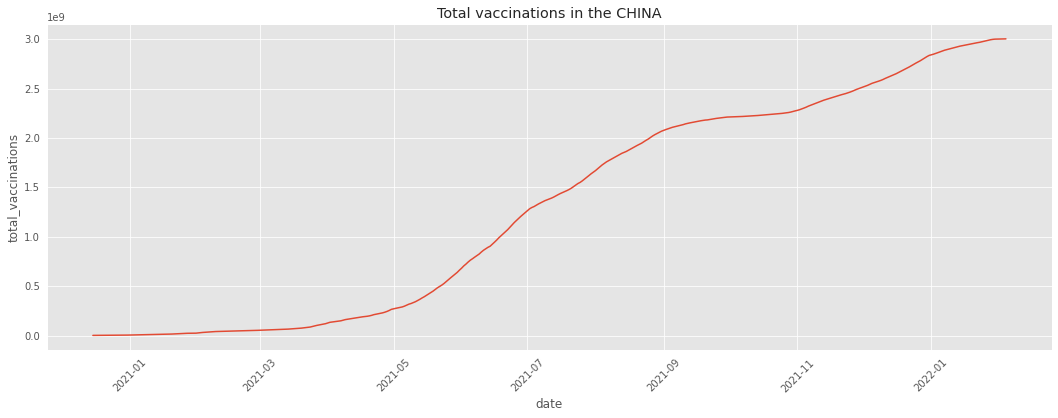

In [ ]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=data_CHINA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the CHINA")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in the CHINA')

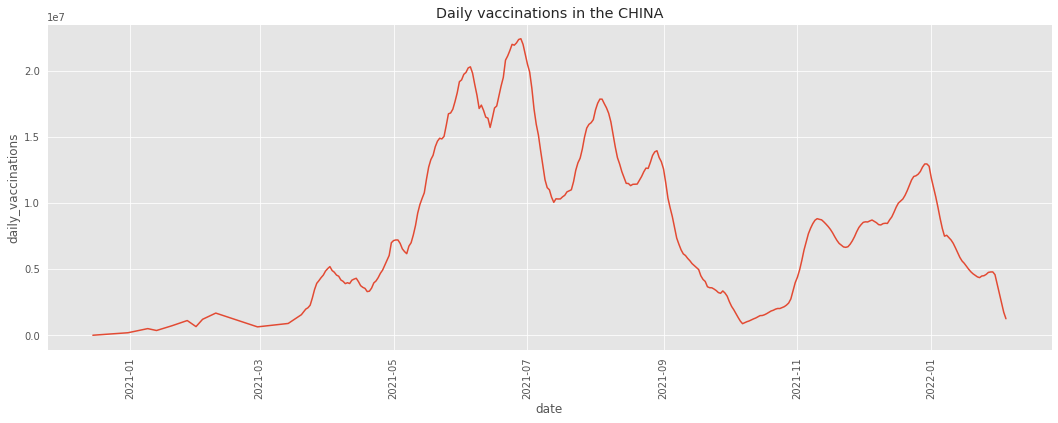

In [ ]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=data_CHINA, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the CHINA")

USA

In [ ]:
#Save USA data into a separate dataframe
data_USA = data_detailed[data_detailed["iso_code"] == 'USA'].copy()
data_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines,Total_vaccinations(count),Full_vaccinations(count)
71361,United States,USA,2020-12-13,26161.0,22014.0,4856.0,0.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71362,United States,USA,2020-12-14,30646.0,26358.0,4959.0,4485.0,0.01,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71363,United States,USA,2020-12-15,79895.0,73377.0,5201.0,26867.0,0.02,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71364,United States,USA,2020-12-16,238936.0,227115.0,5658.0,70925.0,0.07,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71365,United States,USA,2020-12-17,510290.0,491465.0,6371.0,121032.0,0.15,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71775,United States,USA,2022-01-31,541122542.0,250511755.0,211469709.0,600241.0,162.98,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71776,United States,USA,2022-02-01,541633526.0,250640448.0,211604456.0,569294.0,163.14,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71777,United States,USA,2022-02-02,541958731.0,250720992.0,211695417.0,513459.0,163.24,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
71778,United States,USA,2022-02-03,541999799.0,250731754.0,211707700.0,418414.0,163.25,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN


In [ ]:
#Droping the dates with missing values,of which previouly filled the Nan values with 0  
data_USA.drop(data_USA.index[data_USA['total_vaccinations'] == 0], inplace = True)

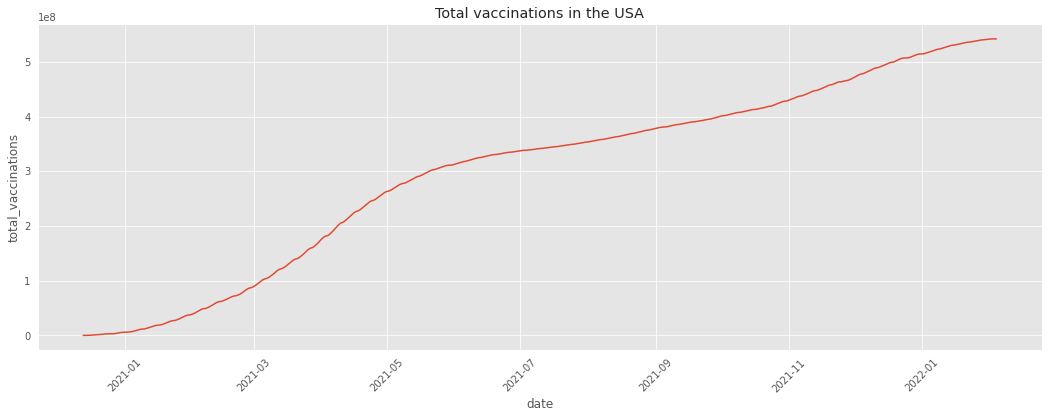

In [ ]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=data_USA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in the USA')

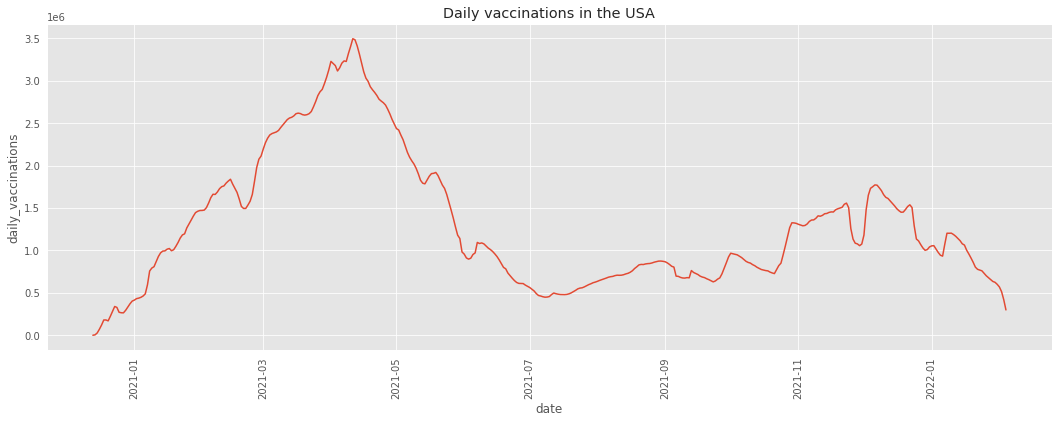

In [ ]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=data_USA, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the USA")

INDIA

In [ ]:
#Save INDIA data into a separate dataframe
data_India = data_detailed[data_detailed["iso_code"] == 'IND'].copy()
data_India

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines,Total_vaccinations(count),Full_vaccinations(count)
30715,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
30716,India,IND,2021-01-16,1.911810e+05,191181.0,0.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
30717,India,IND,2021-01-17,2.243010e+05,224301.0,0.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
30718,India,IND,2021-01-18,4.540490e+05,454049.0,0.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
30719,India,IND,2021-01-19,6.748350e+05,674835.0,0.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31096,India,IND,2022-01-31,1.664786e+09,943027714.0,709926447.0,5909456.0,119.48,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
31097,India,IND,2022-02-01,1.671164e+09,944749420.0,714073668.0,5835935.0,119.93,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
31098,India,IND,2022-02-02,1.677031e+09,946259127.0,717972069.0,5835309.0,120.35,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN
31099,India,IND,2022-02-03,1.681518e+09,947341172.0,721020585.0,6057863.0,120.68,"Covaxin, Oxford/AstraZeneca, Sputnik V",NaN,NaN


In [ ]:
#Droping the dates with missing values,of which previouly filled the Nan values with 0 
data_India.drop(data_India.index[data_India['total_vaccinations'] == 0], inplace = True)

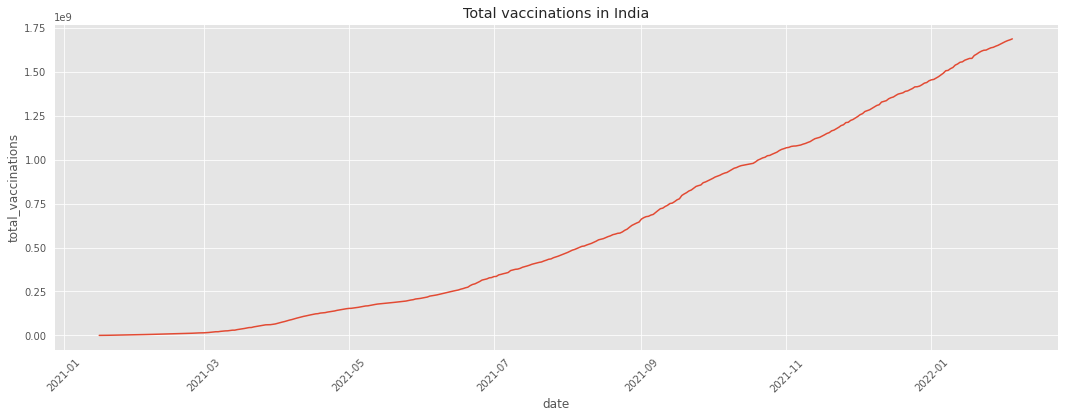

In [ ]:
#Plot total vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=data_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in India')

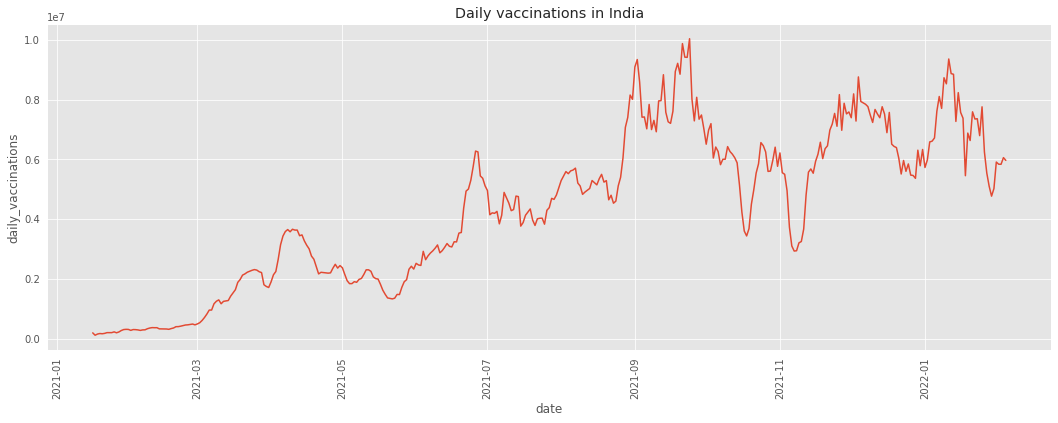

In [ ]:
#Plot daily vaccinations as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=data_India, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")

4-8.Finally finding total vaccinations per hundred, by Country on a map.

In [ ]:
fig1 = px.choropleth(data_detailed.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  
fig1.show()

